## Task 1

### Linear Regression
#### Data reading & plotting

In [ ]:
import pandas as pd

# read data frame from file
df = pd.read_csv('linear_regression_data.csv')

In [ ]:
# save the train and test, data and target separatly
X_train, y_train, X_test, y_test = df['X_train'], df['y_train'], df['X_test'], df['y_test']

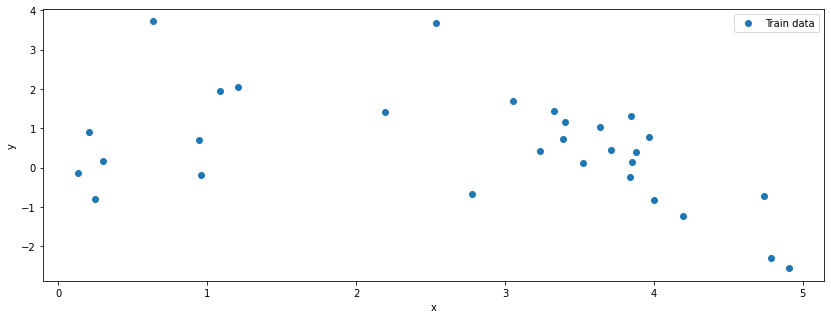

In [ ]:
import matplotlib.pyplot as plt

# plot X_train against y_train to visualize the data
plt.figure(figsize=(14, 5))
# define the data to plot, specify the form and label
plt.plot(X_train, y_train, 'o', label='Train data')
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Linear regression model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# initialize LinearRegression from sklearn
reg = LinearRegression()
# fit the model to the dataset, and fix the dimenstionality of the X_train
reg.fit(np.asarray(X_train)[:, np.newaxis], y_train)

LinearRegression()

#### Linear regression model prediction & Evaluation


In [ ]:
from sklearn import metrics

def print_metrics(y_actual, y_pred):
    #MSE
    mse = metrics.mean_squared_error(y_actual, y_pred)
    #RMSE
    rmse = metrics.mean_squared_error(y_actual, y_pred, squared=False)
    #MAE
    mae = metrics.mean_absolute_error(y_actual, y_pred)
    #R2
    r2 = metrics.r2_score(y_actual, y_pred)

    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAE:', mae)
    print('R2:', r2)

In [ ]:
# predict on X_test
y_pred_lr = reg.predict(np.asarray(X_test)[:, np.newaxis])
# evaluate performance
print_metrics(y_test, y_pred_lr)

MSE: 0.78105677092199
RMSE: 0.8837741628504365
MAE: 0.7837610302414408
R2: 0.2609450135378707


#### Plotting original data and prediction


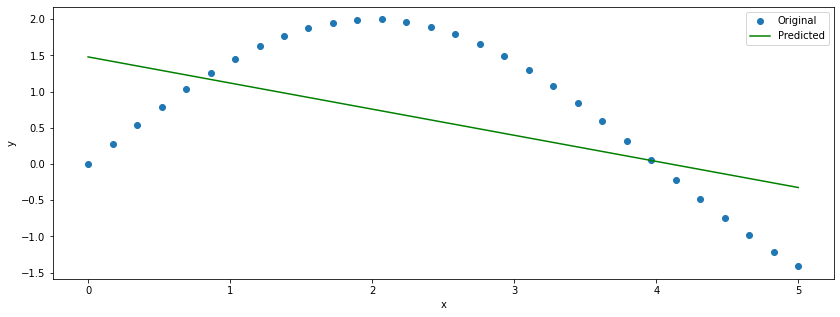

In [ ]:
import matplotlib.pyplot as plt

# plot the test data and the predictions on X_test
plt.figure(figsize=(14, 5))

plt.plot(X_test, y_test, 'o', label='Original')
# pick another presentation style for predicted data
plt.plot(X_test, y_pred_lr, color='g', label='Predicted')
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Linear regression model does not give a good fit. If we look closely at the original data, it is clear that the points on the graph are more like a parabola than a straight line. From this we can conclude that a polynomial regression would fit better. Looking at R2, which is less than 0.5, we understand that the model does not fit the data

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# constructing a polynomial regression pipeline
pipeline = Pipeline([("polynomial_features", PolynomialFeatures()), ("linear_regression", LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# define parameters
degrees = range(2, 10)
parameters = {'polynomial_features__degree': degrees}

# initialize search
search = GridSearchCV(pipeline, parameters, cv=8, scoring='neg_mean_squared_error')

# fix the dimenstionality of the X_train
x = np.asarray(X_train)[:, np.newaxis]

# search best parameters
search.fit(x, y_train)
print("Best parameter (CV score=%0.3f):" %search.best_score_, search.best_params_['polynomial_features__degree'])
print()

Best parameter (CV score=-1.078): 2



In [ ]:
# predict on X_test
pipeline.fit(x, y_train)
y_pred_gs = pipeline.predict(np.asarray(X_test)[:, np.newaxis])

# evaluate preformance
print_metrics(y_test, y_pred_gs)

MSE: 0.08205877217937999
RMSE: 0.2864590235607529
MAE: 0.15213273421671694
R2: 0.9223539862658872


#### Manually finding the best degree

In [ ]:
# initialize variables for saving the answer
best_degree = 0
negative_mse = 100000000

for d in degrees:
    # construct a pipeline
    pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=d)),
                         ("linear_regression", LinearRegression())])
    # fit on the data
    pipeline.fit(x, y_train)

    # evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, x, y_train,
                             scoring="neg_mean_squared_error", cv=8)

    # update the answer if we obtain the better result of the metrci "negative MSE"
    if -scores.mean() < negative_mse:
        negative_mse = -scores.mean()
        best_degree = d

# print the best parameters
print("Best parameter (Negative MSE=%0.3f):" %-negative_mse, best_degree)

Best parameter (Negative MSE=-1.078): 2


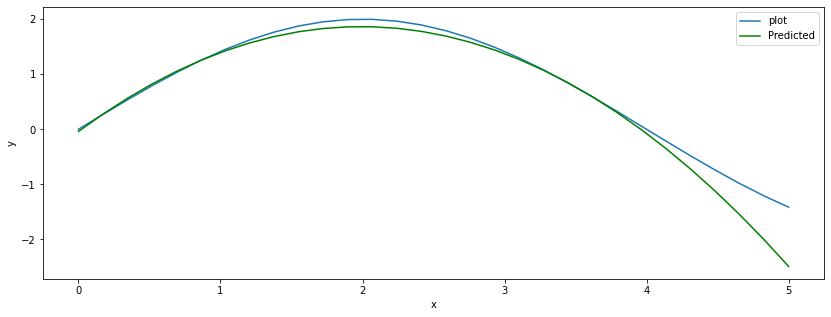

In [ ]:
# plotting the test data and the best degree polynomial model
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="plot")
plt.plot(X_test, y_pred_gs, color='g', label="Predicted")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [ ]:
import pandas as pd
# load the data
data = pd.read_csv('pokemon_modified.csv')

#### Remove the 2 redundant features

In [ ]:
# there are 3 features that may be dropped: name, classification, and type, because they
# are categorical features and may give no information. Let's check all of them to select 2
# that we will drop

name_unique = set(data['name'])
classification_unique = set(data['classification'])
type_unique = set(data['type1'])

print("All names: 801, unique: %d" %len(name_unique))
print("All classifications: 801, unique: %d" %len(classification_unique))
print("All types: 801, unique: %d" %len(type_unique))

# given the fact, that the more unique classes we have, the less information we get about
# each, we decide, that we need to drop name and classification column

All names: 801, unique: 801
All classifications: 801, unique: 588
All types: 801, unique: 17


In [ ]:
# split the data on input and target
X = data.drop(['is_legendary', 'name', 'classification'], axis=1)

y = data['is_legendary']

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with the ratio of 0.8/0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [ ]:
# check if the dataset is balanced
print("Number of elements in the first class (legendary): %d" %np.sum(y))
print("Number of elements in the second class (non-legendary): %d" %(801 - np.sum(y)))

# we see that quantity of elements in classes differ much, so the dataset id unbalanced

Number of elements in the first class (legendary): 70
Number of elements in the second class (non-legendary): 731


#### Exploring the dataset and checking for missing values

In [ ]:
# explore the dataset
data.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [ ]:
# we check the data instead of X_train and X_test, because we did not modify the data yet
data.info()

# here we see that features height_m, percentage_male and weight_kg have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Impute the missing values

In [ ]:
from sklearn.impute import SimpleImputer

# initialize imputer with the "mean" strategy
imputer = SimpleImputer(strategy='mean')

# impute the missing values in X_train and X_test
X_train['height_m'] = imputer.fit_transform(np.asarray(X_train['height_m'])[:, np.newaxis])
X_train['percentage_male'] = imputer.fit_transform(np.asarray(X_train['percentage_male'])[:, np.newaxis])
X_train['weight_kg'] = imputer.fit_transform(np.asarray(X_train['weight_kg'])[:, np.newaxis])

X_test['height_m'] = imputer.fit_transform(np.asarray(X_test['height_m'])[:, np.newaxis])
X_test['percentage_male'] = imputer.fit_transform(np.asarray(X_test['percentage_male'])[:, np.newaxis])
X_test['weight_kg'] = imputer.fit_transform(np.asarray(X_test['weight_kg'])[:, np.newaxis])

#### Double check that there are no missing values

In [ ]:
# double check that there are no missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 564 to 693
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        640 non-null    float64
 1   against_dark       640 non-null    float64
 2   against_dragon     640 non-null    float64
 3   against_electric   640 non-null    float64
 4   against_fairy      640 non-null    float64
 5   against_fight      640 non-null    float64
 6   against_fire       640 non-null    float64
 7   against_flying     640 non-null    float64
 8   against_ghost      640 non-null    float64
 9   against_grass      640 non-null    float64
 10  against_ground     640 non-null    float64
 11  against_ice        640 non-null    float64
 12  against_normal     640 non-null    float64
 13  against_poison     640 non-null    float64
 14  against_psychic    640 non-null    float64
 15  against_rock       640 non-null    float64
 16  against_steel      640 n

In [ ]:
# check the X_test also
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 574 to 219
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        161 non-null    float64
 1   against_dark       161 non-null    float64
 2   against_dragon     161 non-null    float64
 3   against_electric   161 non-null    float64
 4   against_fairy      161 non-null    float64
 5   against_fight      161 non-null    float64
 6   against_fire       161 non-null    float64
 7   against_flying     161 non-null    float64
 8   against_ghost      161 non-null    float64
 9   against_grass      161 non-null    float64
 10  against_ground     161 non-null    float64
 11  against_ice        161 non-null    float64
 12  against_normal     161 non-null    float64
 13  against_poison     161 non-null    float64
 14  against_psychic    161 non-null    float64
 15  against_rock       161 non-null    float64
 16  against_steel      161 n

#### Encode categorically

In [ ]:
X_train.head()

# check what we need to encode - just type1

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation
564,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.00,...,1000000,1.2,74,88.100000,water,83,65,32,81.0,5
493,1.0,2.0,1.0,1.0,0.5,0.5,0.50,1.0,2.0,0.50,...,1250000,0.4,100,55.070736,psychic,100,100,100,4.0,5
70,1.0,1.0,1.0,0.5,0.5,0.5,2.00,2.0,1.0,0.25,...,1059860,1.7,80,50.000000,grass,100,70,70,15.5,1
240,1.0,1.0,1.0,1.0,1.0,2.0,1.00,1.0,0.0,1.00,...,1250000,1.2,95,0.000000,normal,40,70,100,75.5,2
749,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,2.00,...,1000000,2.5,100,50.000000,ground,55,85,35,920.0,7


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# initialize encoder, fit and transform the values
encoder = OneHotEncoder(drop='first')
train = encoder.fit_transform(X_train[['type1']]).toarray()
test = encoder.fit_transform(X_test[['type1']]).toarray()

# make from the new data a dataframe
new_col_train = pd.DataFrame(train, columns=encoder.get_feature_names_out())
new_col_test = pd.DataFrame(test, columns=encoder.get_feature_names_out())

# fix indexes, concatenate and drop the column 'type1'
new_col_train.index = X_train.index
X_train = pd.concat([X_train, new_col_train], axis=1)
X_train.drop('type1', axis=1, inplace=True)

# fix indexes, concatenate and drop the column 'type1'
new_col_test.index = X_test.index
X_test = pd.concat([X_test, new_col_test], axis=1)
X_test.drop('type1', axis=1, inplace=True)

In [ ]:
# check if we did everything right
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
564,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
493,1.0,2.0,1.0,1.0,0.5,0.5,0.50,1.0,2.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70,1.0,1.0,1.0,0.5,0.5,0.5,2.00,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,1.0,1.0,1.0,1.0,1.0,2.0,1.00,1.0,0.0,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
749,1.0,1.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,2.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1.0,1.0,1.0,1.0,1.0,2.0,0.50,0.5,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54,1.0,1.0,1.0,2.0,1.0,1.0,0.50,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0,1.0,1.0,1.0,0.5,0.5,0.5,2.00,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
289,1.0,1.0,1.0,0.0,1.0,0.5,2.00,2.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# also check for X_test
X_test

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
574,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
723,1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
401,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,0.5,1.0,2.0,0.5,1.0,0.5,0.5,1.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
764,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
449,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# initialize MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# scale the data
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# check
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Correlation Matrix

Ssome features are highly correlated, we can drop them, and do not loose the data

<AxesSubplot:>

<Figure size 2160x2160 with 0 Axes>

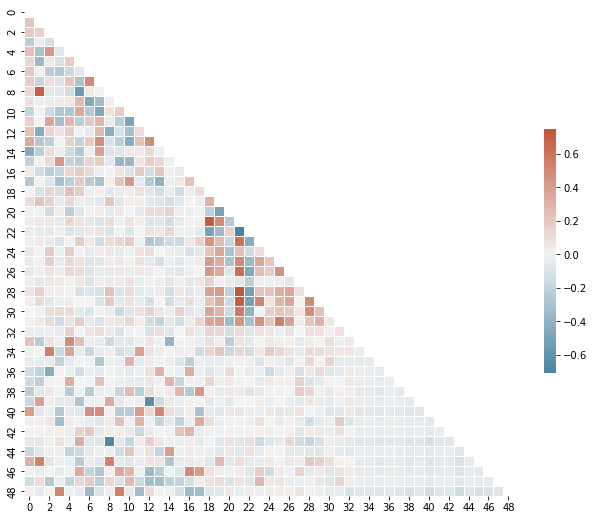

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the correlation matrix
plt.figure(figsize=(30, 30))

corr = np.corrcoef(X_train.transpose())
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# we can drop one feature with the index 8 and 21, because it is highly correlated with some other features
# we would not loose important data, because we can find this information in the correlated features

print(X_train.columns[8])
print(X_train.columns[21])

against_ghost
base_total


In [ ]:
# drop higly correlated features
X_train = X_train.drop(['against_ghost', 'base_total'], axis=1)
X_test = X_test.drop(['against_ghost', 'base_total'], axis=1)

### Model fitting and Comparison

#### Tuning LR model

In [ ]:
# caclulate and print metrics
def print_clf_metrics( y_actual, y_pred ):
    print(f'Testing accuracy = {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Testing precision = {metrics.precision_score(y_test, y_pred)}')
    print(f'Testing recall = {metrics.recall_score(y_test, y_pred)}')
    print(f'Testing F1-score = {metrics.f1_score(y_test, y_pred)}')

In [ ]:
# set parameters for Grid Search
parameters = {'penalty':['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

max_iter=1000 in LR constructor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# create Grid Search on Logistic Regression
gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters, cv=5, n_jobs=-1, error_score=0)

In [ ]:
# find the best hyper-parameter for the model
gs_clf.fit(X_train, y_train)

# predict on X_test
y_pred_gs = gs_clf.predict(X_test)

ValueError: Invalid parameter 'polynomial_features' for estimator LogisticRegression(max_iter=1000). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [ ]:
# print the best parameters and evaluate the accuracy
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_gs))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

#### Construct a LR with the best params and Evaluate the LR with the best params

In [ ]:
# construct a LR with the best parameters
lr_clf = LogisticRegression(penalty='l1', C=10.0, solver='liblinear')

In [ ]:
# fir the model and predict on X_test
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

In [ ]:
# evaluate the LR using accuracy, precision, recall, and F1-score
print_clf_metrics(y_test, y_pred_lr)

Testing accuracy = 0.9937888198757764
Testing precision = 0.9333333333333333
Testing recall = 1.0
Testing F1-score = 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [ ]:
# get the coefficients from the LR
coefs = lr_clf.coef_
columns = pd.DataFrame(X_train.columns, columns=['col'])
# make a dataframe with columns "name of feature", and "coeffitient"
important = pd.concat([columns, pd.DataFrame(coefs.transpose(), columns=['coef'])], axis=1)
# sort by coeffitient
important = important.sort_values(by=['coef'], ascending=False)

In [ ]:
# take the 5 most important features
important.head()

,col,coef
18,base_egg_steps,13.127553
28,speed,8.908313
22,experience_growth,8.720971
36,type1_fire,3.284753
21,defense,3.030014


In [ ]:
# take the 5 least important features
important.tail()

,col,coef
23,height_m,-2.045932
25,percentage_male,-2.075379
2,against_dragon,-7.367624
41,type1_normal,-9.403051
20,capture_rate,-11.675930


#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define parameters for Grid Search
param_grid = {'n_neighbors': list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

# construct Grid Search
grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=1)

# fit the search and predict on X_test
grid_search_clf.fit(X_train, y_train)
y_pred_grid = grid_search_clf.predict(X_test)

# print the best hyper-parameters for KNN and the obtained accuracy
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred_grid))

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9751552795031055


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
# construct the KNN model with the best parameters
knn = KNeighborsClassifier(metric='cosine', n_neighbors=1, weights='uniform')
# fit the model and predict on X_test
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
# evaluate the model using accuracy, precisin, recall, and F1-score
print_clf_metrics(y_test, y_pred_knn)

Testing accuracy = 0.9751552795031055
Testing precision = 1.0
Testing recall = 0.7142857142857143
Testing F1-score = 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

# construct Gaussian Naive-Bayes
gauss_nb = GaussianNB()
# fit the model and predict on X_test
gauss_nb.fit(X_train, y_train)
y_pred = gauss_nb.predict(X_test)

# evaluate the model using accuracy, precision, recall, and F1-score
print_clf_metrics(y_test, y_pred)

Testing accuracy = 0.9316770186335404
Testing precision = 0.56
Testing recall = 1.0
Testing F1-score = 0.717948717948718


#### Our dataset is not balanced, so accuracy is not a reliable metrci for this case. We should look on both metrics: precision and recall, but for this purposes we can take only F1-score, because it is a combination of precision and recall. Thus F-1 score metrci is the most appropriate

#### LR:
###### Testing accuracy = 0.9937888198757764
###### Testing precision = 0.9333333333333333
###### Testing recall = 1.0
###### Testing F1-score = 0.9655172413793104

#### KNN:
###### Testing accuracy = 0.9751552795031055
###### Testing precision = 1.0
###### Testing recall = 0.7142857142857143
###### Testing F1-score = 0.8333333333333333

#### GNB
###### Testing accuracy = 0.9316770186335404
###### Testing precision = 0.56
###### Testing recall = 1.0
###### Testing F1-score = 0.717948717948718

## Based on the answer above I will pick the model with the highest F1-score, and it is LR